In [24]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import time
import mediapipe as mp

In [25]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [26]:
def mediapipe_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image, results

In [27]:
def draw_landmarks(image, result):
    mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [30]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [31]:
cap = cv.VideoCapture('sign.mp4')
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        if not ret:
            print("Video ended or cannot read the frame.")
            break

        image, results = mediapipe_detection(frame, holistic)
            

        draw_styled_landmarks(image, results)

        cv.imshow('OpenCV feed', image)
        if cv.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv.destroyAllWindows()

I0000 00:00:1753005729.282385    6467 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1753005729.352362   11643 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 570.172.08), renderer: NVIDIA GeForce RTX 4070 SUPER/PCIe/SSE2
W0000 00:00:1753005729.457032   11616 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753005729.492396   11617 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753005729.495678   11638 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753005729.497944   11636 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000

In [32]:
results.right_hand_landmarks

In [33]:
frame

array([[[130, 131, 133],
        [133, 134, 136],
        [134, 135, 137],
        ...,
        [109, 112, 122],
        [109, 112, 122],
        [109, 112, 122]],

       [[131, 132, 134],
        [134, 135, 137],
        [135, 136, 138],
        ...,
        [109, 112, 122],
        [109, 112, 122],
        [109, 112, 122]],

       [[130, 131, 133],
        [133, 134, 136],
        [134, 135, 137],
        ...,
        [109, 112, 122],
        [109, 112, 122],
        [109, 112, 122]],

       ...,

       [[ 59,  64,  85],
        [ 59,  64,  85],
        [ 58,  63,  84],
        ...,
        [115, 119, 125],
        [113, 117, 123],
        [108, 112, 118]],

       [[ 60,  65,  86],
        [ 60,  65,  86],
        [ 59,  64,  85],
        ...,
        [115, 119, 125],
        [113, 117, 123],
        [108, 112, 118]],

       [[ 61,  66,  87],
        [ 60,  65,  86],
        [ 60,  65,  86],
        ...,
        [115, 119, 125],
        [112, 116, 122],
        [107, 111, 117]]

In [34]:
draw_landmarks(frame, results)

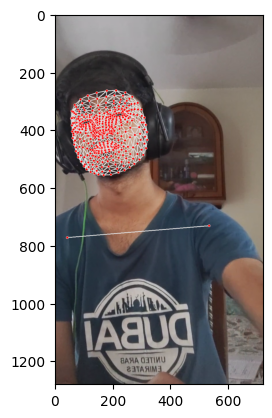

In [35]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))